# Mahima Regunathan - Project - World Demographics

## Description

It is your task to explore and analyze a dataset. Using Pandas and visualization tools of your choice, you will extract insights by inspecting and comparing variables. You will summarize your conclusions and present your findings with plots. 

## Analysis strategy (10 pts)
Describe your plan for analyzing the data, showing you understand the basic elements of exploratory data analysis.
You may want to include a description of the dataset, an analysis strategy for reading in, manipulating, and analyzing data (e.g. pseudo code), including a description of steps and packages used. Describe the reason behind your methods. Hint: you may also fill this section out after your analysis after your analysis to clarify your methods. 

### Dataset:
- This data set has world demographics information including Territory(Country), Population in 1000s, Infant Mortality Rate, Life Expectayc of Male and Female, Development Level, GDP per Capita, Health Expenditure per capita and so on.
- There are a total of 33 columns and 239 rows.
- Format is csv.

### Reading in Data:
- I am using pandas built-in function read_csv() to read the contents of the input dataset in csv format into a dataframe called "demographics".

### Data Cleaning:

#### Removing row with Territory as "World":
- The dataset has the first row as "World" and has all the column values populated for all the countries together. 
- This would skew our analysis. So I removed this row as part of data cleaning.
- This reduced the row count to 238.
- I used slicing technique for this task.

#### Removing Rows with Missing values:
- There are some rows that are missing critical information that we need for analysis.
- So as initial step for data cleaning, I am removing those rows from the dataset.
- I am removing rows if its missing values in the following columns - "Population", "GDP per Capita", "Infant Mortality Rate", "Overall Life Expectancy at Birth", "Development Level".
- After removing the above rows, I got 179 rows.
- I used the dropna method of dataframe for this task.


### Data Manipulation:

#### New Column for Population:
- The Population (1000) column provided in the dataset has values that are in 1000s.
- So I am creating a new column with actual population values as it is better for analysis purposes.
- New column called Population is added to the dataframe and values are calculated as Population (1000) * 1000
- After this step, the dataset has 33 columns.
- I used custom method to achieve this and applied it to the dataframe using apply method.

#### Currency Columns:
- Certain columns have currency values which has dollar sign included. These currency columns are typed as "Object" when checked.
- I need those column values in numerical format for analysis.
- Currency columns used for analysis - "GDP per Capita" and "Health Expenditure per Capita".
- So I am replacing dollar sign in those columns (using regex).
- I am also casting those columns as float type to help further processing & analysis.
- I used regular expression for replacing the dollar sign.
- I used custom function and apply method of dataframe to apply the replacing of sign for each row.
- I also used astype(float) method of dataframe to cast the columns.

### Analysis:

#### Objective 1:
- To determine how "Total Median Age" of a country affects its GDP and Development Age. 
- If I can get top 5 youngest and top 5 oldest countries by age of its population, I can cmopare to check how this affects the GDP / Development Level.
<b>Method:</b>
    - Sort the dataframe by "Total Median Age" ascending and then descending. Used "Sort_values" function of dataframe.
    - Get the top 5 rows from each sorted set.
    - Compare "Developement Level", "GDP per Capita" columns among these datasets to find some insight.

#### Objective 2:
- To compare Male and Female life expectancy and its distributions.
- If I can compare the mean of the above, I can figure out who has more life expectancy.<br>
<b>Method:</b>
    - Obtain Mean value of Male and Female life expectancy and compare. Used built-in mean() function.
    - Plot KDE distribution plot for Male and Female life expectancy and compare. Used sns distplot.

#### Objective 3:
- To determine the relationship between "Literacy Ranking" and "Developement Level".
- If I get the highest countires in literacy ranking, I can determine if that has any relationship to Development Level.<br>
<b>Method:</b>
    - Got the dataframe rows where Literacy Ranking is 1.
    - Compared different parameters of these countries.

#### Objective 4:
- To find out how the parameters - "Infant Mortality Rate", "Overall Life Expectancy at Birth", "GDP per Capita", "Literacy Rate", "Health Expenditure per Capita" fare between the different categories of "Development Level".
- Since the countries are grouped by their development level, it would be interesting to see if this level correlates to the above parameters.<br>
<b>Method:</b>
    - Used groupby() method of dataframe to group the rows by "Development Level"
    - Compared the values of the above parameters to find out relationship.

#### Objective 5:
- To find out how "Infant Mortality Rate" relates to "Health Expenditure per Capita".
- Just based on intution that the healthcare expenditure must affect Infant mortality rate
- Plotted a sns scatter plot to determine relationship. 

#### Objective 6:
- To find out the realtionship between between GDP and Education years.
- Plotted a sns scatter plot to determine relationship with an overlay of "Development Level"


## Read in the file (5 pts)

In [1]:
import pandas as pd

In [2]:
#pd.set_option('display.precision',4)

demographics = pd.read_csv("World Demographics.csv")
demographics.head()

,Territory,Population (1000),Crude Death Rate (1000),Crude Birth Rate (1000),Infant Mortality Rate,Infant Mortality Ranking,Five-Year Mortality Rate,Five-Year Mortality Ranking,M/F at Birth,M/F under 15,...,Years of Compulsory Education,HDI,HDI Ranking,Development Level,Literacy Rate,Literacy Ranking,GER,GDP per Capita,Health Expenditure per Capita,Health Expenditure per Capita Ranking
0,World,6817462.939,8.60,20.30,42.09,NaN,73.7,NaN,1.07,1.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$10310.29,$790.00,NaN
1,Afghanistan,28150.000,19.18,45.46,151.95,222.0,235.4,194.0,1.05,1.05,...,6.0,0.352,181.0,Low,NaN,NaN,50.1,$829.48,$91.00,136.0
2,Aland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,3182.000,5.55,15.29,18.62,115.0,22.3,91.0,1.10,1.10,...,8.0,0.818,70.0,High,99.0,19.0,67.8,$7099.31,$381.00,90.0
4,Algeria,34895.000,4.64,16.90,27.73,145.0,33.2,120.0,1.05,1.04,...,9.0,0.754,104.0,Medium,69.9,135.0,73.6,$7001.00,$315.00,100.0


In [3]:
demographics.columns

Index(['Territory', 'Population (1000)', 'Crude Death Rate (1000)',
       'Crude Birth Rate (1000)', 'Infant Mortality Rate',
       'Infant Mortality Ranking', 'Five-Year Mortality Rate',
       'Five-Year Mortality Ranking', 'M/F at Birth', 'M/F under 15',
       'M/F 15–30', 'M/F over 65', 'M/F Total', 'Total Median Age',
       'Male Median Age', 'Female Median Age',
       'Overall Life Expectancy at Birth', 'Male Life Expectancy at Birth',
       'Female Life Expectancy at Birth', 'Life Expectancy Ranking',
       'GDP (PPP) $M', 'Average Years of Education of Adults',
       'Years of Compulsory Education', 'HDI', 'HDI Ranking',
       'Development Level', 'Literacy Rate', 'Literacy Ranking', 'GER',
       'GDP per Capita', 'Health Expenditure per Capita',
       'Health Expenditure per Capita Ranking'],
      dtype='object')

## Data Cleaning and Data Manipulation (some uses Custom Functions)

In [4]:
# Custom function to populate new column based on existing column for data analysis
# The "Population (1000)" column provided in the dataset has values that are in 1000s.
# So its better to create a new column with actual population values for analysis purposes

def createNewColumn(val):
    return val * 1000
    
demographics["Population"] = demographics.apply(lambda x: createNewColumn(x["Population (1000)"]), axis = 1)
demographics.head()

,Territory,Population (1000),Crude Death Rate (1000),Crude Birth Rate (1000),Infant Mortality Rate,Infant Mortality Ranking,Five-Year Mortality Rate,Five-Year Mortality Ranking,M/F at Birth,M/F under 15,...,HDI,HDI Ranking,Development Level,Literacy Rate,Literacy Ranking,GER,GDP per Capita,Health Expenditure per Capita,Health Expenditure per Capita Ranking,Population
0,World,6817462.939,8.60,20.30,42.09,NaN,73.7,NaN,1.07,1.06,...,NaN,NaN,NaN,NaN,NaN,NaN,$10310.29,$790.00,NaN,6.817463e+09
1,Afghanistan,28150.000,19.18,45.46,151.95,222.0,235.4,194.0,1.05,1.05,...,0.352,181.0,Low,NaN,NaN,50.1,$829.48,$91.00,136.0,2.815000e+07
2,Aland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,3182.000,5.55,15.29,18.62,115.0,22.3,91.0,1.10,1.10,...,0.818,70.0,High,99.0,19.0,67.8,$7099.31,$381.00,90.0,3.182000e+06
4,Algeria,34895.000,4.64,16.90,27.73,145.0,33.2,120.0,1.05,1.04,...,0.754,104.0,Medium,69.9,135.0,73.6,$7001.00,$315.00,100.0,3.489500e+07


In [5]:
# Function to remove the row with "World" since this has the data for 
# all the countries put together and this will skew the analysis.
# We are interested in analysing the demographics across all the countries
# This comes under Data manipulation

def removeFirstRow(df):
    return df[1:]
    
demographics = removeFirstRow(demographics)
demographics.head()

,Territory,Population (1000),Crude Death Rate (1000),Crude Birth Rate (1000),Infant Mortality Rate,Infant Mortality Ranking,Five-Year Mortality Rate,Five-Year Mortality Ranking,M/F at Birth,M/F under 15,...,HDI,HDI Ranking,Development Level,Literacy Rate,Literacy Ranking,GER,GDP per Capita,Health Expenditure per Capita,Health Expenditure per Capita Ranking,Population
1,Afghanistan,28150.0,19.18,45.46,151.95,222.0,235.4,194.0,1.05,1.05,...,0.352,181.0,Low,NaN,NaN,50.1,$829.48,$91.00,136.0,28150000.0
2,Aland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,3182.0,5.55,15.29,18.62,115.0,22.3,91.0,1.10,1.10,...,0.818,70.0,High,99.0,19.0,67.8,$7099.31,$381.00,90.0,3182000.0
4,Algeria,34895.0,4.64,16.90,27.73,145.0,33.2,120.0,1.05,1.04,...,0.754,104.0,Medium,69.9,135.0,73.6,$7001.00,$315.00,100.0,34895000.0
5,American Samoa,67.0,4.10,23.31,10.18,72.0,NaN,NaN,1.06,1.04,...,NaN,NaN,NaN,NaN,NaN,NaN,$8582.09,NaN,NaN,67000.0


In [6]:
# Function to drop rows if certain columns are null. 
# There are several rows that has null values for certain important columns like "Population"
# It is better to remove them before analysis

def dropNullRows(df):
    df.dropna(subset = ["Population", "GDP per Capita", "Infant Mortality Rate", "Overall Life Expectancy at Birth", "Development Level"], inplace = True)
    
    
print("Shape before dropping null rows", demographics.shape)
prev_rows = demographics.shape[0]
dropNullRows(demographics)
print("Shape after dropping null rows", demographics.shape)
new_rows = demographics.shape[0]

delta = prev_rows - new_rows

print("Total of", delta,"rows have been removed in this step")

Shape before dropping null rows (238, 33)
Shape after dropping null rows (179, 33)
Total of 59 rows have been removed in this step


In [7]:
# Custom function to convert currency columns to float type
import re

def castCurrencyColumns(df):
    df["GDP per Capita"] = df["GDP per Capita"].replace('[\$,]', '', regex=True).astype(float)
    df["Health Expenditure per Capita"] = df["Health Expenditure per Capita"].replace('[\$,]', '', regex=True).astype(float)
    

# Custom function to convert currency columns to float type
def replaceCurrencySymbol(val):
    if str(val) == '':
        return 0
    else:
        return re.sub('[\$,]', '', str(val))


demographics["GDP per Capita"] = demographics.apply(lambda x: replaceCurrencySymbol(x["GDP per Capita"]), axis = 1)
demographics["Health Expenditure per Capita"] = demographics.apply(lambda x: replaceCurrencySymbol(x["Health Expenditure per Capita"]), axis = 1)
      
print(demographics["GDP per Capita"].dtype)
print(demographics["Health Expenditure per Capita"].dtype)
demographics["GDP per Capita"] = demographics["GDP per Capita"].astype(float)
demographics["Health Expenditure per Capita"] = demographics["Health Expenditure per Capita"].astype(float)
print(demographics["GDP per Capita"].dtype)
print(demographics["Health Expenditure per Capita"].dtype)

object
object
float64
float64


## Pandas insights (5 pts)
Provide at least 3 insights using Pandas. These may include descriptive statistics such as mean, median, counts, etc. Use built-in Pandas functions.

### Insight 1

In [8]:
# Top 5 youngest and oldest countries (by Median age of the population)

# Top 5 youngest countries
youngest_five = demographics.sort_values("Total Median Age")
youngest_five = youngest_five[["Territory", "Total Median Age", "Development Level", "GDP per Capita"]]
youngest_five.head()

,Territory,Total Median Age,Development Level,GDP per Capita
223,Uganda,15.0,Medium,1289.51
155,Niger,15.2,Low,703.07
133,Mali,15.8,Low,1059.43
184,Sao Tome and Principe,16.4,Medium,1791.41
51,"Congo, the Democratic Republic of the",16.4,Low,327.78


In [9]:
# Top 5 oldest countries
oldest_five = demographics.sort_values("Total Median Age", ascending = False)
oldest_five = oldest_five[["Territory", "Total Median Age", "Development Level", "GDP per Capita"]]
oldest_five.head()

,Territory,Total Median Age,Development Level,GDP per Capita
108,Japan,44.2,Very High,32477.63
81,Germany,43.8,Very High,34382.12
106,Italy,43.3,Very High,29174.91
96,Hong Kong,42.3,Very High,42881.13
15,Austria,42.2,Very High,39066.37


Insight:
- As can be seen, the countires with highest median age are all Very highly developed with a very high GDP.
- On the contrary, the countires with lowest median age are not well developed (either Low / Medium) and have lower GDP.
- One possible explanation is that when a country become sdeveloped, population growth rate decreases hence Median age increases.
- Another possible explanation can be that when a lot of population is much younger than the working age, the country's GDP is low.

### Insight 2

In [10]:
# Function that checks which value is greater in the passed paramter - for life expectancy comparison
def whoHasGreaterLifeExpectancy(male, female):
    if female > male:
        return "F"
    else:
        return "M"

In [11]:
# Comparison of Life Expectancy Men VS Women

mean_male_expectancy = demographics["Male Life Expectancy at Birth"].mean()
mean_female_expectancy = demographics["Female Life Expectancy at Birth"].mean()

print("Mean value of Male life expectancy is", mean_male_expectancy,\
      "\nwhereas Mean value of Female life expectancy is", mean_female_expectancy)

who = whoHasGreaterLifeExpectancy(mean_male_expectancy, mean_female_expectancy)
if who == "F":
    print("Women seem to have a longer life expectancy than men!")
else:
    print("Men seem to have a longer life expectancy than women!")

Mean value of Male life expectancy is 65.98480446927378 
whereas Mean value of Female life expectancy is 70.80882681564245
Women seem to have a longer life expectancy than men!


Insight: 
- Women seem to have a longer life expectancy than men on an average (by about 5 years).

### Insight 3

In [12]:
# Country that has # 1 Literary Ranking

demographics[demographics["Literacy Ranking"] == 1][["Literacy Ranking", "Territory", "Literacy Rate", "Development Level"]]

,Literacy Ranking,Territory,Literacy Rate,Development Level
56,1.0,Cuba,99.8,High
68,1.0,Estonia,99.8,High
80,1.0,Georgia,100.0,Medium
119,1.0,Latvia,99.8,High


Insight:
- Interestingly, there are 4 countries that share the Literacy Ranking of 1

- Another interesting insight is that, their Literacy Rates show a slight difference

- Finally, we see that the countries that have great literacy ranking are developed. 
- But the dataset also has "Very High" developed nations which just shows that having top Literacy ranking does not guarantee "Very High" development levels.

## Groupby analysis (10 pts)
Perform at least one analysis using groupby

In [13]:
gropued_demographics = demographics.groupby("Development Level")\
.agg({"Infant Mortality Rate": "median", "Overall Life Expectancy at Birth" : "median", "GDP per Capita" : "median",\
     "Literacy Rate" : "median", "Health Expenditure per Capita" : "median", "Territory" : "count"})
gropued_demographics.sort_values("Infant Mortality Rate", ascending = False)

,Infant Mortality Rate,Overall Life Expectancy at Birth,GDP per Capita,Literacy Rate,Health Expenditure per Capita,Territory
Development Level,,,,,,
Low,81.41,52.345,977.715,43.65,59.0,24
Medium,37.00,68.035,4388.145,81.20,164.0,74
High,13.43,74.160,13106.220,96.50,689.0,43
Very High,4.38,79.420,35806.375,99.00,2754.0,38


### Groupby analysis based on Development Level:

I have analyzed 5 parameters with respect to "Development Level". The 5 parameters are
<list>
    <ul>
        Infant Mortality Rate
    </ul>
    <ul>
        Overall Life Expectancy at Birth
    </ul>
    <ul>
        GDP per Capita
    </ul>
    <ul>
        Literacy Rate
    </ul>
    <ul>
        Health Expenditure per Capita
    </ul>
</list>

I have grouped by "Development Level" to understand how each of these parameters are affected by the Developement level of the Territory / Country. I have also taken median of all these columns since mean might not be a true indicator.

<b>Literacy Rate:</b>
<p>Literacy Rate is directly correlated with Development Level. As Development level increases, literacy rate also increases. Rate of increase is not linear.</p>

<b>Overall Life Expectancy at Birth:</b>
<p>Overall Life Expectancy at Birth is directly correlated with Development Level. As Development level increases, Overall Life Expectancy at Birth also increases. Rate of increase is not linear.</p>

<b>GDP per Capita:</b>
<p>GDP per Capita is directly correlated with Development Level. As Development level increases, GDP per Capita also increases. Rate of increase is exponential.</p>

<b>Health Expenditure per Capita:</b>
<p>Health Expenditure per Capita is directly correlated with Development Level. As Development level increases, Health Expenditure per Capita also increases. Rate of increase is not linear.</p>

<b>Infant Mortality Rate:</b>
<p>Infant Mortality Rate is inversely correlated with Development Level. As Development level increases, Infant Mortality Rate decreases. Rate of decrease is not linear.</p>

<b>Number of Territories / Countires </b>
<p> The number of territories in each of the development level is not an equal split. Most of the territories are in the Medium level. And we see fewer territories in Low level.</p>
    
P.S: Territories in the context of this dataset is referring to Countries.

## Analysis with custom functions (15 points) 
Includes at least 2 custom functions. These may perform a custom analysis or data manipulation/cleaning operation. Functions that mimic built-in Numpy or Pandas functions are also acceptable. You may integrate these functions in other steps of the analysis. If this is the case, specify below in which section of the notebook you used a custom function.

Answer: I have used custom functions for Data Cleaning and Manipulation. Custom function is used to create a new column from existing column. Another custom function is used to remove $ values from a column to convert it to a float type.

## Univariate plots (5 points)
Provide at least 3 univariate plots

### Univariate plot 1

In [14]:
import seaborn as sns

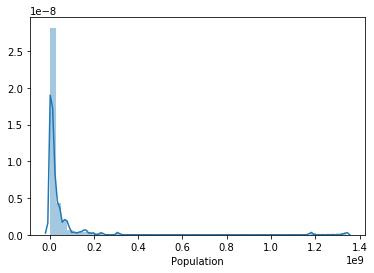

In [15]:
# Population distribution

sns.distplot(demographics["Population"])

The distribution of "Population" is heavily right skewed driven by two outlier countries India & China. 

Just for vizualization purposes, I will plot the distribution of population after removing India & China from the dataset temporarily.

In [16]:
# Making temporary copy of the dataframe to remove "India" & "China" rows.

temp_demographics = demographics.copy(deep = False)

# Removing India & China rows
india_index = temp_demographics[temp_demographics["Territory"] == "India"].index
temp_demographics.drop(india_index, inplace = True)

china_index = temp_demographics[temp_demographics["Territory"] == "China"].index
temp_demographics.drop(china_index, inplace = True)

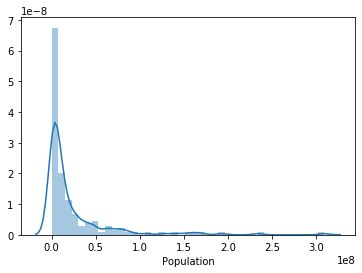

In [17]:
# Population distribution after removing India & China rows

sns.distplot(temp_demographics["Population"])

It is proven that the above distribution is also heavily right skewed.

### Univariate plot 2

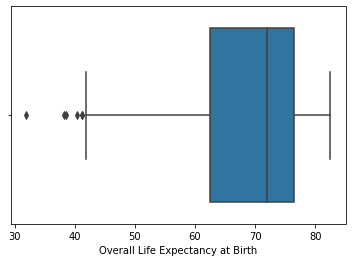

In [18]:
# Box plot of Life expectancy

sns.boxplot(data=demographics, x="Overall Life Expectancy at Birth")

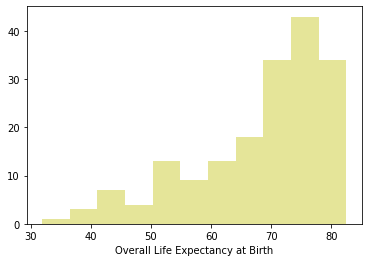

In [19]:
# Overall Life Expectancy at Birth distribution - Histogram

sns.distplot(demographics["Overall Life Expectancy at Birth"], hist= True, kde= False, color="y")

The distribution of "Overall Life Expectancy at Birth" is left skewed.

### Univariate plot 3

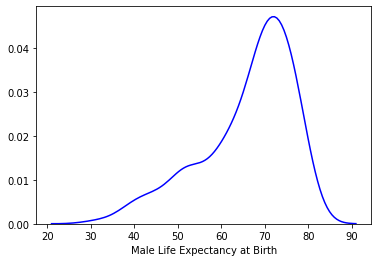

In [20]:
# Male Life Expectancy at Birth distribution - KDE plot

sns.distplot(demographics["Male Life Expectancy at Birth"], hist= False, color="blue")

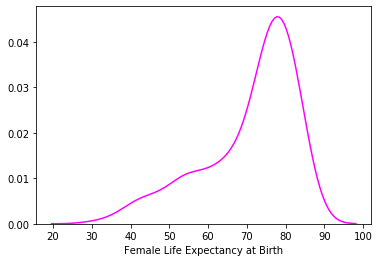

In [21]:
# Female Life Expectancy at Birth distribution - KDE plot

sns.distplot(demographics["Female Life Expectancy at Birth"], hist= False, color="magenta")

I have plotted 2 univariate graphs showing the distribution of "Male Life Expectancy at Birth" and "Female Life Expectancy at Birth".
The plots are similar but the distribution is more after 70 for Female.

## Bivariate plots (10 points)
Provide at least 2 bivariate plots

### Bivariate plot 1

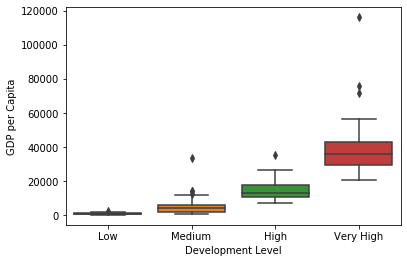

In [22]:
# GDP per Capita and Health Expenditure per Capita
sorted_demographics = demographics.sort_values("GDP per Capita")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.boxplot(y="GDP per Capita", x="Development Level", data = sorted_demographics)

We observe a direct relationship, i.e. the GDP per Capita is more for countires with higher development level.

### Bivariate plot 2

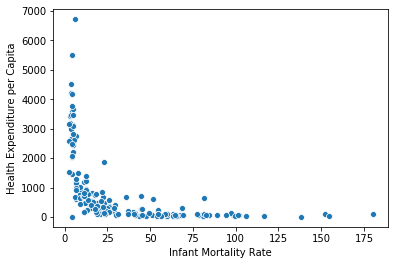

In [23]:
sns.scatterplot(x ="Infant Mortality Rate", y="Health Expenditure per Capita", data = demographics)

We observe an inverse relationship, i.e. the higher the health expenditure per capita, the infant mortality rate goes down <b>exponentially</b>.

## Multivariate plot (10 points)
Provide at least 1 multivariate

### Multivariate plot 1

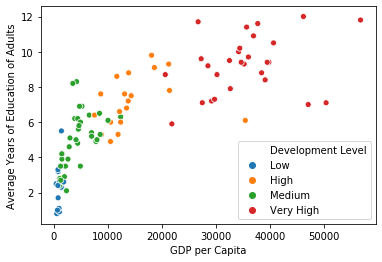

In [24]:
# scatter plot with 3 variables
sns.scatterplot(x="GDP per Capita", y="Average Years of Education of Adults", hue = "Development Level", data = demographics)

We can see a general positive trend with higher development levels having higher average years of education of adults.

Representing the same data in terms of cat plot below:

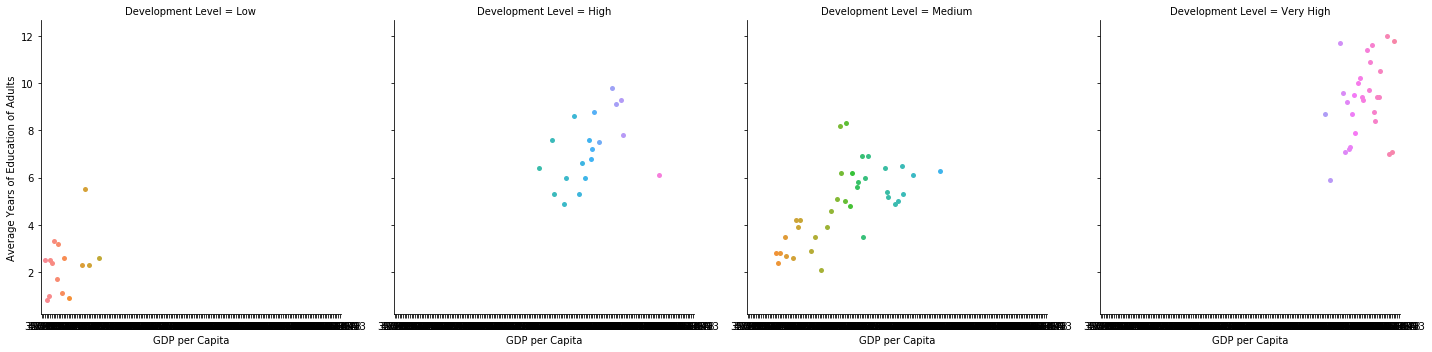

In [25]:
# the same data above is represented as a catplot
sns.catplot(data=demographics, x="GDP per Capita", y="Average Years of Education of Adults", kind="strip", col="Development Level")

## Conclusions (20 points)
Summarize your conclusions including discovered insights. 

Here is a summary of the insights from all the above analysis:<br><br>


<b>1. Life Expectancy of Male and Female:</b>
<span>
- Mean Female Life expectancy came out to be higher than Mean Male Life expectancy.
- When plotting the distribution of male and female life expectancy, even though the plots looked similar, the distribution has higher population after 70 for Female. This again proves the above point.<br><br>
</span>
<b>2. Total Median Age:</b>
<span>
- The countires with highest median age are all Very highly developed with a very high GDP.
- On the contrary, the countires with lowest median age are not well developed (either Low / Medium) and have lower GDP.
- One possible explanation is that when a country becomes developed, population growth rate decreases hence Median age increases.
- Another possible explanation can be that when a lot of population is much younger than the working age, the country's GDP is low.<br><br>
</span>
<b>3. Literacy Ranking:</b>
<span>
- Interestingly, there are 4 countries that share the Literacy Ranking of 1.
- Another interesting insight is that, their Literacy Rates show a slight difference.
- Finally, we see that the countries that have great literacy ranking are developed. 
- But the dataset also has "Very High" developed nations which just shows that having top Literacy ranking does not guarantee "Very High" development levels.
- The countries that had highest literacy ranking fell into different levels of development.<br><br>
</span> 
<b>4. Group by analysis based on Developement Level:</b>
<span>
    
I have grouped by "Development Level" to understand how each of these parameters are affected by the Developement level of the Territory / Country. I have also taken median of all these columns since mean might not be a true indicator.

- Literacy Rate:
Literacy Rate is directly correlated with Development Level. As Development level increases, literacy rate also increases. Rate of increase is not linear.

- Overall Life Expectancy at Birth:
Overall Life Expectancy at Birth is directly correlated with Development Level. As Development level increases, Overall Life Expectancy at Birth also increases. Rate of increase is not linear.

- GDP per Capita:
GDP per Capita is directly correlated with Development Level. As Development level increases, GDP per Capita also increases. Rate of increase is exponential.

- Health Expenditure per Capita:
Health Expenditure per Capita is directly correlated with Development Level. As Development level increases, Health Expenditure per Capita also increases. Rate of increase is not linear.

- Infant Mortality Rate:
Infant Mortality Rate is inversely correlated with Development Level. As Development level increases, Infant Mortality Rate decreases. Rate of decrease is not linear.

- Number of Territories / Countires
The umber of territories in each of the development level is not an equal split. Most of the territories are in the Medium level. And we see realtively less number of territories in Low level.
    
P.S: Territories in the context of this dataset is referring to Countries.<br><br>
</span>
<b>5. Population:</b>
<span>
- The distribution of "Population" is heavily right skewed.
- It has 2 outlier countries India and China. <br><br>
</span>
<b>6. Overall Life Expectancy at Birth:</b>
<span>
- The box plot of "Overall Life Expectancy at Birth" shows that the median life expectancy is ~ 73 years.
- The distribution of "Overall Life Expectancy at Birth" is left skewed. <br><br>
</span>
<b>7. Relationship between Health Expenditure per capita and Infant Mortality Rate:</b>
<span>
- We observe an inverse relationship, i.e. the higher the health expenditure per capita, the infant mortality rate goes down exponentially.<br><br>
</span>
<b>8. Relationship between Development Level and GDP Per capita: </b>
<span>
- We observe a direct relationship, i.e. the GDP per Capita is more for countires with higher development level.<br><br>
</span>
<b>9. Relationship between GDP per Capita, Average Years of Education of Adults and Developement Level: </b>
<span>
- We can see a general positive trend with higher development level countries having higher average years of education of adults.
- For low development levels, there is no increase in GDP from 1 to 5 years.
- There is a quantum increase in GDP per capita as we go from a lower development level to a higher one.
- This indicates that not all the increase in GDP per capita can be explained by increased years of adult education, because the per capita income of a higher development level is higher than that for a lower one, at the same education duration.

    


## Code is functional and runs without error (10 pts)
Verify this by following these steps.

1) Reset Kernel. Kernel>>Restart Kernel...

2) Rerun all cells. Run>>Run All Cells